In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
plt.style.use('seaborn')

## Generate Data

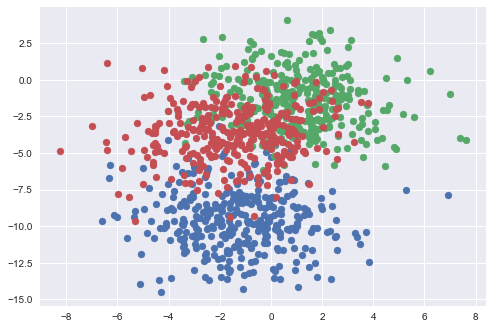

In [3]:
# generate 2d classification datasets
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
    
    # select indices of points with the class label
    row_ix = np.where(y == class_value)
    # scatter plot for points with a different color
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show plot
plt.show()

In [4]:
# one hot encode output variable
y = to_categorical(y)

# split into train and valid
n_train = 500

trainX, validX = X[:n_train, :], X[n_train:, :]
trainy, validy = y[:n_train], y[n_train:]

## 1) Batch Gradient Descent (batch_size=train_size)

In [5]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [6]:
# compile model
optimizer = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [7]:
# train model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, batch_size=len(trainX), verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 214ms/step - loss: 5.7551 - accuracy: 0.3900 - val_loss: 4.3995 - val_accuracy: 0.4040
Epoch 2/200
1/1 [==============================] - 0s 38ms/step - loss: 4.4958 - accuracy: 0.3920 - val_loss: 2.5103 - val_accuracy: 0.4200
Epoch 3/200
1/1 [==============================] - 0s 63ms/step - loss: 2.4576 - accuracy: 0.4020 - val_loss: 4.3846 - val_accuracy: 0.2420
Epoch 4/200
1/1 [==============================] - 0s 84ms/step - loss: 4.4034 - accuracy: 0.2440 - val_loss: 4.4408 - val_accuracy: 0.4060
Epoch 5/200
1/1 [==============================] - 0s 56ms/step - loss: 4.5215 - accuracy: 0.3860 - val_loss: 0.8872 - val_accuracy: 0.5600
Epoch 6/200
1/1 [==============================] - 0s 45ms/step - loss: 0.9590 - accuracy: 0.5100 - val_loss: 1.8935 - val_accuracy: 0.5040
Epoch 7/200
1/1 [==============================] - 0s 30ms/step - loss: 2.1681 - accuracy: 0.4820 - val_loss: 2.2983 - val_accuracy: 0.5120
Epoch 8/200
1/1 [==

In [8]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.808, Valid: 0.832


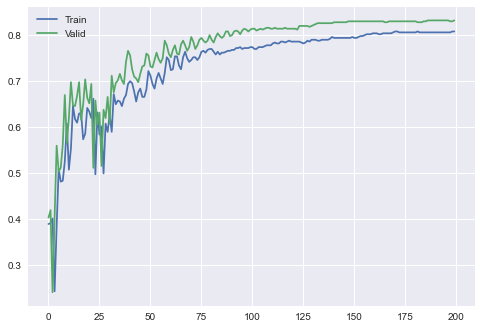

In [9]:
# plot training history
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

## 2) Stochastic Gradient Descent (batch_size=1)

In [10]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [11]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, batch_size=1, verbose=1)

Epoch 1/200
500/500 [==============================] - 1s 2ms/step - loss: 1.4304 - accuracy: 0.6500 - val_loss: 0.7504 - val_accuracy: 0.6580
Epoch 2/200
500/500 [==============================] - 5s 10ms/step - loss: 0.8408 - accuracy: 0.6440 - val_loss: 0.5755 - val_accuracy: 0.7720
Epoch 3/200
500/500 [==============================] - 8s 15ms/step - loss: 0.9292 - accuracy: 0.5920 - val_loss: 0.6412 - val_accuracy: 0.6940
Epoch 4/200
500/500 [==============================] - 4s 7ms/step - loss: 0.9149 - accuracy: 0.5060 - val_loss: 0.9102 - val_accuracy: 0.5420
Epoch 5/200
500/500 [==============================] - 2s 4ms/step - loss: 0.9780 - accuracy: 0.4960 - val_loss: 0.9049 - val_accuracy: 0.5740
Epoch 6/200
500/500 [==============================] - 4s 8ms/step - loss: 0.9423 - accuracy: 0.5360 - val_loss: 0.9383 - val_accuracy: 0.4580
Epoch 7/200
500/500 [==============================] - 7s 13ms/step - loss: 0.9306 - accuracy: 0.5460 - val_loss: 0.8244 - val_accuracy: 0.6

In [15]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.474, Valid: 0.490


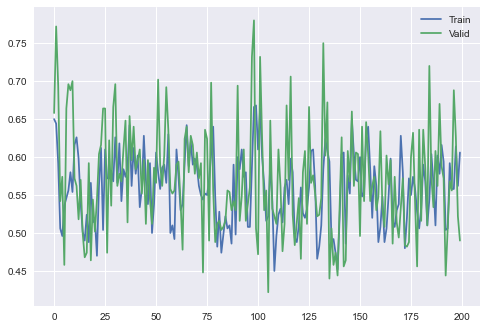

In [16]:
# plot training history
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

## 3) Stochastic Gradient Descent (batch_size=1, lr=0.001)

In [17]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [18]:
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [19]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, batch_size=1, verbose=1)

Epoch 1/200
500/500 [==============================] - 1s 2ms/step - loss: 2.6541 - accuracy: 0.5380 - val_loss: 0.6385 - val_accuracy: 0.7660
Epoch 2/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9927 - accuracy: 0.6620 - val_loss: 0.5702 - val_accuracy: 0.7520
Epoch 3/200
500/500 [==============================] - 1s 1ms/step - loss: 0.6358 - accuracy: 0.7300 - val_loss: 0.6812 - val_accuracy: 0.7180
Epoch 4/200
500/500 [==============================] - 1s 1ms/step - loss: 0.6257 - accuracy: 0.7380 - val_loss: 0.4750 - val_accuracy: 0.8000
Epoch 5/200
500/500 [==============================] - 1s 1ms/step - loss: 0.5442 - accuracy: 0.7860 - val_loss: 0.4928 - val_accuracy: 0.7920
Epoch 6/200
500/500 [==============================] - 1s 2ms/step - loss: 0.5216 - accuracy: 0.7640 - val_loss: 0.5495 - val_accuracy: 0.7740
Epoch 7/200
500/500 [==============================] - 1s 1ms/step - loss: 0.4784 - accuracy: 0.8060 - val_loss: 0.4870 - val_accuracy: 0.7920

In [20]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.836, Valid: 0.824


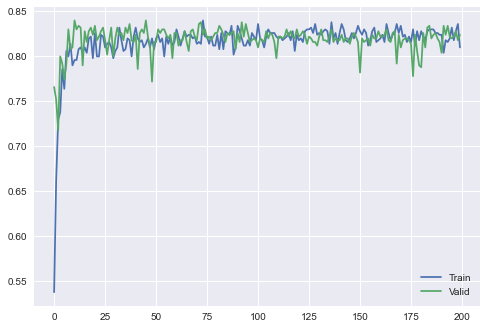

In [21]:
# plot training history
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

## 4) Mini Batch Size on Model Behavior (batch_size=32, lr=0.01)

In [20]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [21]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [22]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
16/16 [==============================] - 0s 7ms/step - loss: 5.3402 - accuracy: 0.4260 - val_loss: 3.8662 - val_accuracy: 0.5000
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 3.0152 - accuracy: 0.5920 - val_loss: 1.9389 - val_accuracy: 0.6880
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 1.6481 - accuracy: 0.6180 - val_loss: 1.0358 - val_accuracy: 0.7460
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.9491 - accuracy: 0.6620 - val_loss: 0.6295 - val_accuracy: 0.7540
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.7300 - val_loss: 0.6204 - val_accuracy: 0.7520
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.7520 - val_loss: 0.5123 - val_accuracy: 0.8100
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7540 - val_loss: 0.5217 - val_accuracy: 0.8160
Epoch 8/200
1

In [23]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.832, Valid: 0.818


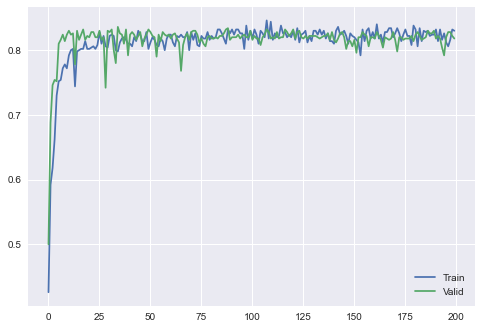

In [24]:
# plot training history
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

## 5) Effect of Batch Size on Model Behavior

In [25]:
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

    # one hot encode output variable
    y = to_categorical(y)
    
    # split into train and valid
    n_train = 500
    trainX, validX = X[:n_train, :], X[n_train:, :]
    trainy, validy = y[:n_train], y[n_train:]
    return trainX, trainy, validX, validy

In [26]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, n_batch):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))

    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()

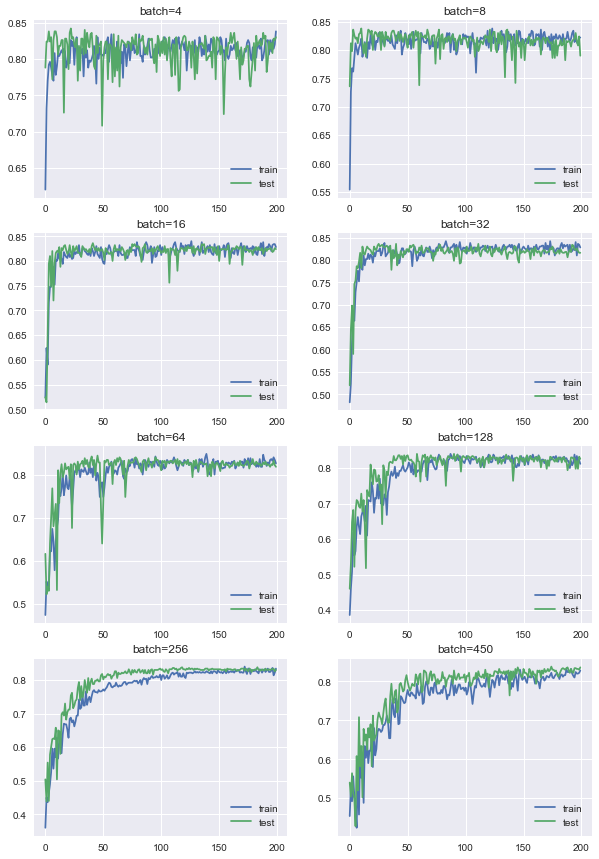

In [27]:
# prepare dataset
trainX, trainy, validX, validy = prepare_data()

# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]

plt.figure(figsize=(10, 15))
for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy, validX, validy, batch_sizes[i])

# show learning curves
plt.show()

---